In [8]:
import pandas as pd
import numpy as np
import neattext.functions as nfx
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

# Load the dataset
df = pd.read_csv("E:\DA_PROJECTS\SENTIMENT-ANALYSIS\dataset.csv")

# Function to preprocess text
def preprocess_text(text):
    cleaned_text = nfx.remove_stopwords(text)
    cleaned_text = nfx.remove_punctuations(cleaned_text)
    cleaned_text = nfx.remove_userhandles(cleaned_text)
    return cleaned_text

# Apply preprocessing to the 'Text' column
df['Clean_text'] = df['Text'].apply(preprocess_text)

# Split the data into features and target
X = df['Clean_text']
y = df['Emotion']

# Vectorize the text using CountVectorizer
cv = CountVectorizer()
X_vectorized = cv.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Machine (SVM) Classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plot_confusion_matrix(svm_model, X_test, y_test)

# Sample Prediction
def predict_emotion(text):
    cleaned_text = preprocess_text(text)
    vectorized_text = cv.transform([cleaned_text])
    prediction = svm_model.predict(vectorized_text)[0]
    return prediction

# Sample Predictions
sample_text_1 = "I am feeling so happy today!"
sample_text_2 = "This situation is making me angry."
sample_text_3 = "I'm quite sad about what happened."

print("Sample Prediction 1:", predict_emotion(sample_text_1))
print("Sample Prediction 2:", predict_emotion(sample_text_2))
print("Sample Prediction 3:", predict_emotion(sample_text_3))


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\__init__.py)

Accuracy: 0.6120132202902716
              precision    recall  f1-score   support

       anger       0.55      0.56      0.56       836
     disgust       0.37      0.22      0.28       202
        fear       0.71      0.67      0.69      1104
         joy       0.64      0.72      0.68      2214
     neutral       0.54      0.75      0.63       481
     sadness       0.60      0.55      0.58      1327
       shame       0.85      0.96      0.90        23
    surprise       0.55      0.39      0.46       772

    accuracy                           0.61      6959
   macro avg       0.60      0.60      0.59      6959
weighted avg       0.61      0.61      0.61      6959

Confusion Matrix:
[[ 468   11   41  137   61   90    1   27]
 [  35   44   21   46   10   32    1   13]
 [  82    9  740  127   35   76    0   35]
 [ 102   21  112 1589  107  174    1  108]
 [  15    1    8   67  361   24    0    5]
 [ 103   17   79  273   63  734    0   58]
 [   0    0    0    1    0    0   22    0]
 

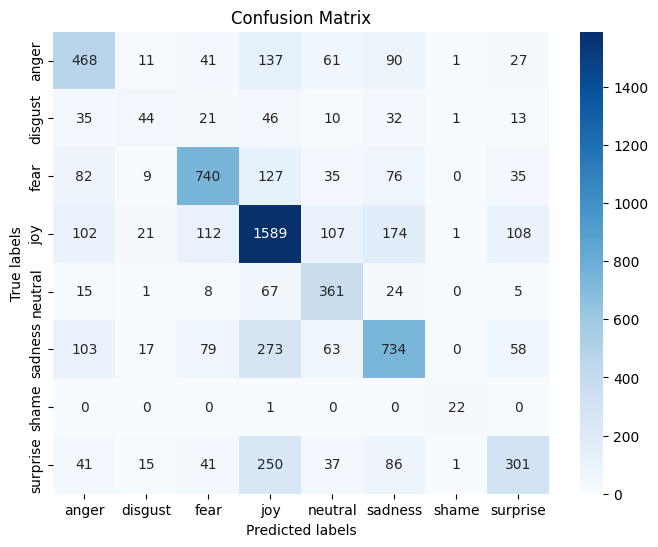

Sample Prediction 1: joy
Sample Prediction 2: anger
Sample Prediction 3: sadness


In [11]:
import pandas as pd
import numpy as np
import neattext.functions as nfx
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df=pd.read_csv(r'E:\amrita class\B Tech CSE-AIE\Third year\SEM 6\NLP\project\Sentiment-Analysis-TextMessages-main\Sentiment-Analysis-TextMessages-main\dataset.csv')
df.head()

# Function to preprocess text
def preprocess_text(text):
    cleaned_text = nfx.remove_stopwords(text)
    cleaned_text = nfx.remove_punctuations(cleaned_text)
    cleaned_text = nfx.remove_userhandles(cleaned_text)
    return cleaned_text

# Apply preprocessing to the 'Text' column
df['Clean_text'] = df['Text'].apply(preprocess_text)

# Split the data into features and target
X = df['Clean_text']
y = df['Emotion']

# Vectorize the text using CountVectorizer
cv = CountVectorizer()
X_vectorized = cv.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Machine (SVM) Classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Custom Confusion Matrix Plot
def plot_confusion_matrix_custom(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Define the unique classes for the confusion matrix
unique_classes = np.unique(y_test)

# Plot the custom confusion matrix
plot_confusion_matrix_custom(y_test, y_pred, classes=unique_classes)

# Sample Prediction
def predict_emotion(text):
    cleaned_text = preprocess_text(text)
    vectorized_text = cv.transform([cleaned_text])
    prediction = svm_model.predict(vectorized_text)[0]
    return prediction

# Sample Predictions
sample_text_1 = "I am feeling so happy today!"
sample_text_2 = "This situation is making me angry."
sample_text_3 = "I'm quite sad about what happened."

print("Sample Prediction 1:", predict_emotion(sample_text_1))
print("Sample Prediction 2:", predict_emotion(sample_text_2))
print("Sample Prediction 3:", predict_emotion(sample_text_3))
